In [43]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:40786,Cluster Workers: 4 Cores: 16 Memory: 135.03 GB


## 1. Simple example

In [44]:
from dask.delayed import delayed
from time import sleep

@delayed
def add(x, y):
    sleep(1)
    return x + y

@delayed
def power(x):
    sleep(1)
    return x**2

@delayed
def sqrt(x):
    sleep(1)
    return x**(1/2)

power = delayed(power)
sqrt = delayed(sqrt)
add = delayed(add)
x = power(20)
y = sqrt(100)
z = add(x, y)
z.compute()  #scheduler='threads'

410.0

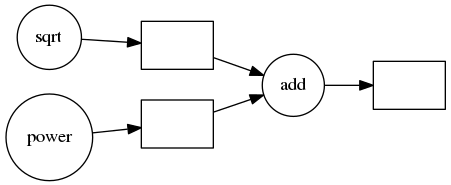

In [45]:
z.visualize(rankdir='LR')

## 2. ML with dask

In [ ]:
from sklearn.externals import joblib

with joblib.parallel_backend('dask'):
    gridsearch_cv.fit(X, y)

## 3. Distributed dask ML model for even faster model fitting

In [ ]:
from dask_ml.xgboost import XGBRegressor

est = XGBRegressor(...)
est.fit(train, train_labels)